# **DATA EXPLORATION AND VISUALIZATION**

In [1]:
#import libraries
import pandas as pd
import ast
import re
from prettytable import PrettyTable

#spelling correction
import enchant
from spellchecker import SpellChecker
from autocorrect import Speller
from textblob import TextBlob


#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP libraries
from nltk import FreqDist

In [2]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


corpus = pd.read_csv('Data/corpus_v4.csv', converters ={'tokens':list_converter})

corpus.head()

,index,text_type,ID,year,long_text,clean_text,word_count,tokens
0,0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,5,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"


In [3]:
#remove unwanted column
corpus = corpus.drop(columns = ['index'])

In [4]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117817 entries, 0 to 117816
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text_type   117817 non-null  object
 1   ID          117817 non-null  object
 2   year        117817 non-null  int64 
 3   long_text   117817 non-null  object
 4   clean_text  114636 non-null  object
 5   word_count  117817 non-null  int64 
 6   tokens      117817 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.3+ MB


In [5]:
#default plot settings

pio.templates.default = "plotly_white"

import matplotlib as mpl

#do not display right and top spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#mpl.rcParams.keys()

## **Number of Submissions/Comments per Year**

In [29]:
corpus.columns

Index(['text_type', 'ID', 'year', 'long_text', 'clean_text', 'word_count',
       'tokens'],
      dtype='object')

In [6]:
#data per year
# Count the number of posts for each year
year_counts = corpus['year'].value_counts().to_dict()

# Create a dictionary showing years and the number of posts for each year
posts_per_year = {year: count for year, count in year_counts.items()}

print(posts_per_year)

{2022: 33196, 2020: 27023, 2021: 25704, 2023: 24510, 2019: 3703, 2018: 1551, 2017: 1029, 2016: 729, 2015: 182, 2014: 126, 2013: 54, 2012: 10}


In [28]:
#random selection of 1% of dataset for manual labelling

import random

#distribution of posts between years
year_counts

#sample should not contain more than half of the entries for any of the years

#calculate maximum entries as 1/2 of entries in each year
max_entries_per_year = {year: count //2 for year, count in year_counts.items()}

#list to hold selected entries for sample dataset
sample = []

#select at least one entry per year:
for year, count in years_count_items():
    sample.extend(random.sample(1,))

{2022: 16598, 2020: 13511, 2021: 12852, 2023: 12255, 2019: 1851, 2018: 775, 2017: 514, 2016: 364, 2015: 91, 2014: 63, 2013: 27, 2012: 5}


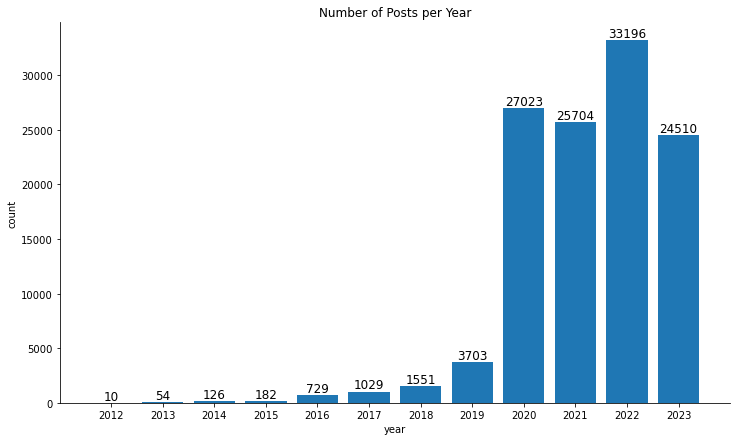

In [19]:
#dataframe holding years and number of posts made in each year
year = corpus['year'].value_counts().reset_index()
year.columns = ['year', 'count'] #rename column labels

#plot the number of posts per year
plt.figure(figsize=(12, 7))
plot = plt.bar(year['year'], year['count'])

plt.xticks(year['year']) #display all ticks
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of Posts per Year')

plt.bar_label(plot, fmt='%d', label_type='edge', fontsize=12)

plt.show()

### **Most Frequent Words**

In [24]:
#list of all words in the dataframe
all_words = [word for token_row in corpus['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

common_words = fdist.most_common(20)

#table of common words
common_words_table = PrettyTable(['word', 'count'])
for word, count in common_words:
    common_words_table.add_row([word, count])

print (common_words_table)

+---------+-------+
|   word  | count |
+---------+-------+
|  people | 15214 |
|   like  | 13811 |
|  dubai  | 12725 |
|   know  |  9703 |
|   good  |  8914 |
|   time  |  8354 |
|  think  |  8090 |
|   work  |  7475 |
|    go   |  7230 |
| country |  6491 |
|   year  |  6486 |
|   want  |  6451 |
|   uae   |  6230 |
|   need  |  6197 |
|   get   |  6083 |
|  thing  |  5792 |
|   pay   |  5704 |
|   say   |  5593 |
|   day   |  5558 |
|   way   |  5516 |
+---------+-------+


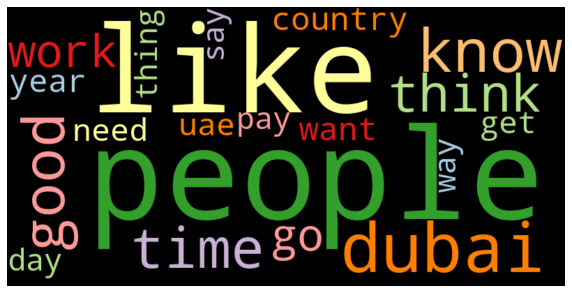

In [22]:
#wordcloud of most frequent words
# Create a dictionary of rare words and their frequencies
common_word_freq = {word: freq for word, freq in common_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,  background_color="black", colormap="Paired").generate_from_frequencies(common_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Rare Words**

In [23]:
rare_words = fdist.most_common()[:-20:-1]

#table of the rare words 
rare_words_table = PrettyTable(['word', 'count'])
for word, count in rare_words:
    rare_words_table.add_row([word,count])

print (rare_words_table)

+---------------+-------+
|      word     | count |
+---------------+-------+
|      ppi      |   1   |
|     eclair    |   1   |
|   enployees   |   1   |
|    pending    |   1   |
|   tradional   |   1   |
| showerthought |   1   |
|      ehhh     |   1   |
|   prometric   |   1   |
|   apparement  |   1   |
| delivery_bike |   1   |
|  internships  |   1   |
|      853      |   1   |
|    minimumi   |   1   |
|    revenues   |   1   |
|   embroider   |   1   |
|    heather    |   1   |
|    3000usd    |   1   |
|  uaeexchange  |   1   |
|    harbored   |   1   |
+---------------+-------+


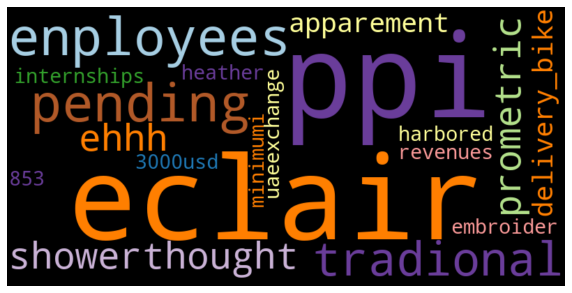

In [26]:
#a wordcloud of the rare words

# Create a dictionary of rare words and their frequencies
rare_word_freq = {word: freq for word, freq in rare_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Paired").generate_from_frequencies(rare_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
